# 0500 Machine Learning

Machine learning is where these computational and algorithmic skills of data science meet the statistical thinking of data science, and the result is a collection of approaches to inference and data exploration

The term is sometimes thrown around as if it is some kind of magic pill: apply ml to your data and your problem will be solved! But the reality is rarely that simeple. While the methods can be incredibly powerful, to be effective they must be approached with a firm grasp of the strenght and weaknesses of each method, as well as a grasp of general concept such as bias and variance, overfitting, underfitting and more.


# 0501 What is ML

Categories: Supervised vs unsupervised learning vs Reinforcement Learning
batch learning vs online learning 

Supervised learning: Models that can predict labels based on labeled training data

    Classification: Models that predict labels as two or more discrete categories
    Regression: Models that predict continuous labels
    
   
Unsupervised learning: Models that identify structure in unlabeled data

    Clustering: Models that detect and identify distinct groups in the data
    Dimensionality reduction: Models that detect and identify lower-dimensional structure in higher-dimensional data

# 0502 Intro to Scikit Learn

This section provides an overview of the Scikit-Learn API, a solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches in the following chapters

## Data Representation in Scikit-Learn

### Data as table

In [1]:
from pandas import *
import numpy as np
import seaborn as sns

In [3]:
iris = read_csv('C:/Users/miaoxi/Documents/LearnPython/seaborn-data-master/iris.csv')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Feature matrix

The samples always refer to an individual objects described by the dataset
The features always refer to ditinct observations that describe each sample in quantitative manner

### Target array

a label or target array, usually contained in numpy array or pandas series.

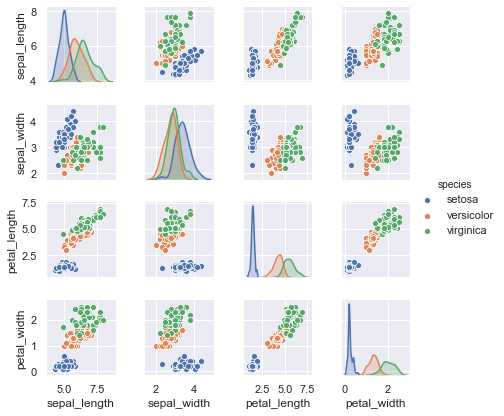

In [6]:
%matplotlib inline
import seaborn as sns;sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [7]:
#extract the feature matrix and target array from dataframe

X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [8]:
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit learn estimator API
    Consistency: All objects share a common interface from a limited set of method
    Inspection: All specified parameter values are exposed as public attributes
    Limited object hierarchy: only algorithms are presented by python classes, datasets ar epresented in standard format and parameter names use python string
    Sensible default value: the library defines an appropriate default value
    
    
## Bsics of the API
 
     1. Import the appropriate estimator from sklearn to choose model
     2. Instantiate the class with appropriate hyperparameters
     3. Split the data into matrix and target vector
     4. Fit the model by calling the fit() method
     5. Apply the model to new data
         a. For supervised learning, use predict() method
         b. for unsupervised learning, we use transform() or predict() method
         
## Supervised learning example
         

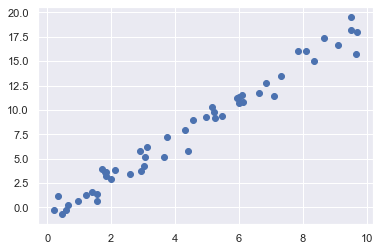

In [9]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

### 1. Choose a class of model

In sklearn, every class of model is rpesented by a python class, if we would like to compute a simple linear regression model

In [10]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparameter

A class of model is not same as an instance of model
The previous step imported the class of model, and now we need to instantiate the LinearRegression class by specifying the hyperparameter


In [11]:
model = LinearRegression(fit_intercept=True)

When the model is instantiated, the only action is the stroing of these hyperparameter values. We have not yet applied the model to any data

### 3. Arrange the data into a feature matrix and target vector


In [15]:
#reshape x to make it matrix of size [n_samples, n_features]

X = x[:, np.newaxis]
X.shape

(50, 1)

### 4. Fit the model to your data

Now it's time to apply our model to data

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The fit() method cause a number of model dependent internal computation to take place and the result of these computation are stored in model specific attributes that the users can explore. In sklearn, all model paramters that were learned during the fit() process have trailing underscores. For example:

In [17]:
model.coef_

array([1.9776566])

In [18]:
model.intercept_

-0.9033107255311164

We can see the slope and intercept of this simple linear fit to the data. 
One question that frequently comes up regards the uncertainty in such internal model parameters. In general sklearn does not provide tool to draw conclusion from internal model parameters. Interpreting model parameter is much more a statistical modeling quesiton thatn a machine learning question. Machine learning rather focus on the model result/prediction. If you'd like to dive into the meaning of fir parameters within the model, it's best to use statsmodel python packages

### 5. Predict labels for unknown data

In [20]:
xfit = np.linspace(-1,11)
xfit = xfit[:,np.newaxis]

In [21]:
yfit = model.predict(xfit)

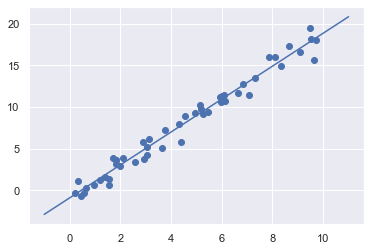

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### Supervised learning example: Iris Classification

In [26]:
#split data into train and validate

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, 
                                               random_state=1)

In [27]:
from sklearn.naive_bayes import GaussianNB #1. choose model
model = GaussianNB()                       #2. instantiate the model
model.fit(Xtrain, ytrain)                  #3. fit the model
y_pred = model.predict(Xtest)              #4. predict the new data

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, ytest)

0.9736842105263158

We can see that Naive bayes works pretty well for this specific data set
### Unsupervised learning example: Iris dimensionality

As an example, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. 

The task of dimensionality reduction is to ask whether there is a suitable lower dimensional representation that retains the essential feature of the data. Often dimensionality reduction is used as an aid to visualize data

Here we use PCA, which is a fast linear dimensionality reduction technique. We'll ask the model to return two components instead of the 4 features

In [29]:
from sklearn.decomposition import PCA   #1. choose the model
model = PCA(n_components=2)             #2. instantiate the model with hyperparamter
model.fit(X_iris)                       #3. fit the model
X_2D = model.transform(X_iris)          #4. in this case, Transform the data

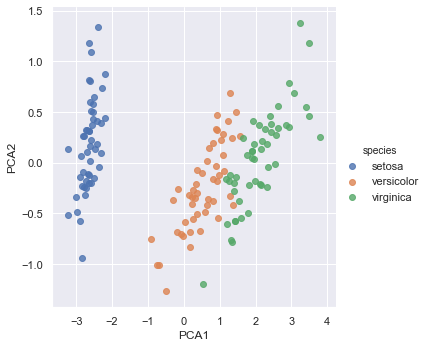

In [31]:
iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

### Unsupervised learning: Iris clustering
Here they used a powerful clustering method called GMM(Gaussian mixture model) to group iris data

In [39]:
from sklearn.mixture import GaussianMixture    #1. choose the model
model=GaussianMixture(n_components =3, 
          covariance_type='full')  #2. instantiate the model
model.fit(X_iris)                  #3. fit the model
y_gmm = model.predict(X_iris)      #4. predict the cluster

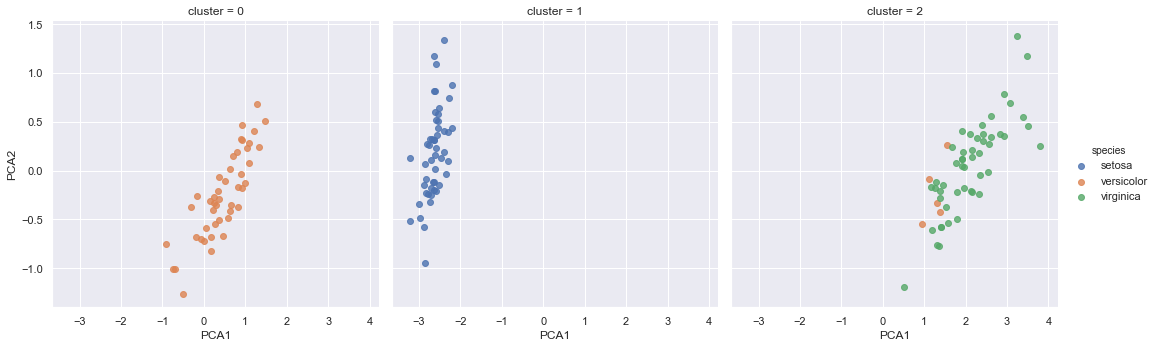

In [40]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False)